## import 包

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

## 读数据，预处理

In [2]:
df = pd.read_csv('~/KDD_CUP_2022/input/sdwpf134_initial_kddcup.csv')

def get_date(k):
    cur_date = "2020-01-01"
    one_day = timedelta(days=k-1)
    return str(datetime.strptime(cur_date, '%Y-%m-%d') + one_day)[:10]

df['Day'] = df['Day'].apply(lambda x: get_date(x))

def cols_concat(df, con_list):
    name = 't1'
    df[name] = df[con_list[0]].astype(str)
    for item in con_list[1:]:
        df[name] = df[name] + ' ' + df[item].astype(str)
    return df

df = cols_concat(df, ["Day", "Tmstamp"])

df = df[['TurbID', 't1', 'Wspd', 'Wdir', 'Etmp', 'Itmp', 'Ndir', 'Pab1', 'Pab2', 'Pab3', 'Prtv', 'Patv']]
df['t1'] = pd.to_datetime(df['t1'])

In [3]:
df

,TurbID,t1,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv
0,1,2020-01-01 00:00:00,2.81,-2.00,16.61,30.95,148.0,0.03,0.03,0.03,-19.38,111.13
1,1,2020-01-01 00:15:00,2.48,-4.30,16.38,30.83,148.0,0.03,0.03,0.03,-15.69,75.30
2,1,2020-01-01 00:30:00,1.16,9.28,16.62,31.05,135.0,0.03,0.03,0.03,-2.50,9.54
3,1,2020-01-01 00:45:00,0.92,14.38,16.13,31.20,148.0,0.04,0.04,0.03,-0.70,0.00
4,1,2020-01-01 01:00:00,1.38,-4.28,15.12,29.52,148.0,89.68,89.69,89.50,-0.30,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
90043,134,2020-01-07 22:45:00,9.94,1.90,22.75,22.63,181.0,90.40,90.39,90.00,-0.30,0.00
90044,134,2020-01-07 23:00:00,9.94,1.90,22.75,22.63,181.0,90.40,90.39,90.00,-0.30,0.00
90045,134,2020-01-07 23:15:00,9.94,1.90,22.75,22.63,181.0,90.40,90.39,90.00,-0.30,0.00
90046,134,2020-01-07 23:30:00,9.94,1.90,22.75,22.63,181.0,90.40,90.39,90.00,-0.30,0.00


## AutoX.AutoTS

In [4]:
from autox import AutoTS
autots = AutoTS(df = df,
                id_col = 'TurbID',
                time_col = 't1',
                target_col = 'Patv',
                time_varying_cols = ['Wspd', 'Wdir', 'Etmp', 'Itmp', 'Ndir', 'Pab1', 'Pab2', 'Pab3', 'Prtv', 'Patv'],
                time_interval_num = 15,
                time_interval_unit = 'minute',
                forecast_period = 4*24*2)

/home/caihengxing/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/home/caihengxing/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  

In [5]:
sub = autots.get_result()

   INFO ->  [+] feature engineer
   INFO ->  [+] fe_rolling_stat
100%|██████████| 4/4 [00:19<00:00,  4.92s/it]
   INFO ->  [+] fe_lag
   INFO ->  [+] fe_diff
   INFO ->  [+] fe_time
   INFO ->  [+] feature combination
100%|██████████| 4/4 [00:00<00:00,  4.85it/s]
   INFO ->  [+] construct data
100%|██████████| 192/192 [33:57<00:00, 10.61s/it]
   INFO ->  [+] fe_time_add
   INFO ->  [+] fe_time_add
   INFO ->  [+] feature_filter
100%|██████████| 375/375 [00:28<00:00, 13.18it/s]
   INFO ->  [+] train model


not_used: ['t2_quarter', 't2_is_month_end', 't1_year', 't1_quarter', 't2_year', 't2_day', 't1', 't1_is_month_end', 't2', 't2_month', 't1_month', 'y']
2020-01-01 00:15:00 2020-01-06 00:00:00
2020-01-06 00:15:00 2020-01-07 23:45:00
(4281886, 375) (718178, 375)
used_features: ['TurbID', 'Wspd', 'Wdir', 'Etmp', 'Itmp', 'Ndir', 'Pab1', 'Pab2', 'Pab3', 'Prtv', 'Patv', 'TurbID__Wspd__4__mean', 'TurbID__Wspd__4__std', 'TurbID__Wspd__4__median', 'TurbID__Wspd__4__max', 'TurbID__Wspd__4__min', 'TurbID__Wspd__4__kurt', 'TurbID__Wspd__4__skew', 'TurbID__Wdir__4__mean', 'TurbID__Wdir__4__std', 'TurbID__Wdir__4__median', 'TurbID__Wdir__4__max', 'TurbID__Wdir__4__min', 'TurbID__Wdir__4__kurt', 'TurbID__Wdir__4__skew', 'TurbID__Etmp__4__mean', 'TurbID__Etmp__4__std', 'TurbID__Etmp__4__median', 'TurbID__Etmp__4__max', 'TurbID__Etmp__4__min', 'TurbID__Etmp__4__kurt', 'TurbID__Etmp__4__skew', 'TurbID__Itmp__4__mean', 'TurbID__Itmp__4__std', 'TurbID__Itmp__4__median', 'TurbID__Itmp__4__max', 'TurbID__Itmp

  0%|          | 0/1 [00:00<?, ?it/s]

Training on model 1
Training until validation scores don't improve for 150 rounds.
[100]	training's rmse: 168.666	valid_1's rmse: 269.257
Early stopping, best iteration is:
[20]	training's rmse: 252.801	valid_1's rmse: 242.914
rmse: 242.91365327141008
ReTraining on all data


100%|██████████| 1/1 [06:54<00:00, 414.11s/it]

Model 1 finished in 0:06:54.104682


## 查看特征重要性

In [6]:
autots.feature_importances.head(10)

,feature,model_1,average
0,TurbID,192,192.0
1,t2_hour,150,150.0
2,k_step,92,92.0
3,t2_dayofweek,33,33.0
4,TurbID__Prtv__64__min,27,27.0
5,TurbID__Prtv__64__max,22,22.0
6,t1_day,22,22.0
7,t1_dayofweek,21,21.0
8,TurbID__Wspd__64__mean,20,20.0
9,t1_hour,19,19.0


## 输出结果

In [7]:
sub.to_csv("./autox_kdd.csv", index=False)

## 画图

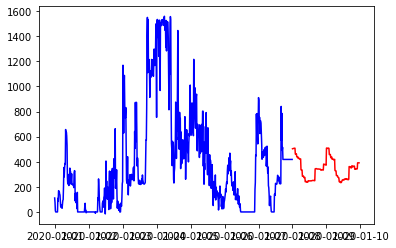

In [8]:
cur_TurbID = 1

plt.plot(df.loc[df['TurbID'] == cur_TurbID, 't1'], df.loc[df['TurbID'] == cur_TurbID, 'Patv'], color = 'b')
plt.plot(sub.loc[sub['TurbID'] == cur_TurbID, 't2'], sub.loc[sub['TurbID'] == cur_TurbID, 'y_mean'], color = 'r')

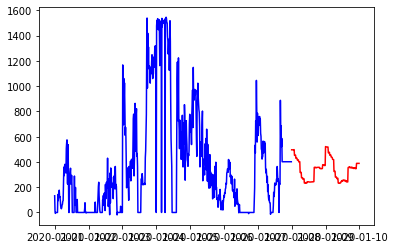

In [10]:
cur_TurbID = 3

plt.plot(df.loc[df['TurbID'] == cur_TurbID, 't1'], df.loc[df['TurbID'] == cur_TurbID, 'Patv'], color = 'b')
plt.plot(sub.loc[sub['TurbID'] == cur_TurbID, 't2'], sub.loc[sub['TurbID'] == cur_TurbID, 'y_mean'], color = 'r')